### Import data

In [25]:
import pandas as pd

cohort = pd.read_csv('./eicu_cohort.csv')

### Check missing data

In [26]:
cohort.isnull().sum()

gender                     0
age                        9
admissionweight            5
unabridgedhosplos          0
acutephysiologyscore       0
apachescore                0
actualhospitalmortality    0
heartrate                  0
meanbp                     0
creatinine                 0
temperature                0
respiratoryrate            0
wbc                        0
admissionheight            2
dtype: int64

### Convert "actualhospitalmortality" to categorical data

In [27]:
cohort['actualhospitalmortality'] = pd.Categorical(cohort['actualhospitalmortality'])

### Encode "actualhospitalmortality"

In [28]:
cohort['actualhospitalmortality_enc'] = cohort['actualhospitalmortality'].cat.codes

### Encode "gender"

In [29]:
cohort['gender'] = pd.Categorical(cohort['gender'])
cohort['gender_enc'] = cohort['gender'].cat.codes

### Drop the original "actualhospitalmortality" and "gender"

In [30]:
cohort_enc = cohort.drop(['actualhospitalmortality', 'gender'], axis=1)

### Partition data

In [31]:
from sklearn.model_selection import train_test_split

x = cohort_enc.drop(['actualhospitalmortality_enc'], axis=1)
y = cohort['actualhospitalmortality_enc']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

### Impute missing data

In [32]:
x_train = x_train.fillna(x_train.median())
x_test = x_test.fillna(x_train.median())

### Normalisation using MinMaxScaler

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Linear regression with gradient descent - code implementation

Try changing the learning rate to a larger value. 

In [34]:
import numpy as np

# Example dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])

# Initialize parameters
m = 0
c = 0
alpha = 0.01
iterations = 1000
n = len(y)

# Gradient Descent
for _ in range(iterations):
    # Compute the predictions
    y_pred = m * X + c
    
    # Compute the loss
    loss = (1/n) * np.sum((y - y_pred)**2)
    
    # Compute the gradients
    D_m = (-2/n) * np.sum((y - y_pred) * X)
    D_c = (-2/n) * np.sum(y - y_pred)
    
    # Update the parameters
    m = m - alpha * D_m
    c = c - alpha * D_c
    
    # Print cost every 100 iterations for monitoring
    if _ % 100 == 0:
        print(f"Iteration {_}, Loss: {loss}, m: {m}, c: {c}")

print(f"Final parameters: m: {m}, c: {c}")

Iteration 0, Loss: 41.6, m: 0.42400000000000004, c: 0.11200000000000002
Iteration 100, Loss: 0.7665628599978045, m: 1.9059282143770073, c: 0.06169245456133501
Iteration 200, Loss: 0.6649271897537754, m: 1.990409660913352, c: -0.2433123732427329
Iteration 300, Loss: 0.6132995871074874, m: 2.0506211327082022, c: -0.4606948914186865
Iteration 400, Loss: 0.5870744503164055, m: 2.093534949699397, c: -0.6156273872372938
Iteration 500, Loss: 0.5737529369309602, m: 2.124120411802504, c: -0.7260506101440839
Iteration 600, Loss: 0.5669860430042547, m: 2.1459192299372924, c: -0.8047512603382077
Iteration 700, Loss: 0.5635486817908276, m: 2.161455646240948, c: -0.8608426528726022
Iteration 800, Loss: 0.5618026145050758, m: 2.1725287342436084, c: -0.9008200140340034
Iteration 900, Loss: 0.5609156693232697, m: 2.18042072654854, c: -0.9293126103704044
Final parameters: m: 2.18599815406887, c: -0.9494488934269667


### Fit data into a Linear Regression model only using "apachescore" and "actualhospitalmortality"

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

x_apache = cohort_enc['apachescore'].values.reshape(-1, 1)
y = cohort['actualhospitalmortality_enc']

x_apache_train, x_apache_test, y_train, y_test = train_test_split(x_apache, y, train_size=.7, random_state=42)

scaler = MinMaxScaler()
scaler.fit(x_apache_train)
x_apache_train = scaler.transform(x_apache_train)
x_apache_test = scaler.transform(x_apache_test)

model = LinearRegression()
model = model.fit(x_apache_train, y_train)
y_pred = model.predict(x_apache_test)

### Plot the fitted linear regression line

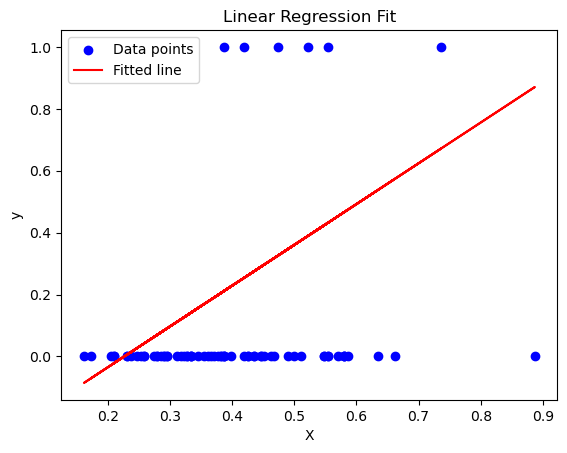

In [36]:
import matplotlib.pyplot as plt

plt.scatter(x_apache_test, y_test, color='blue', label='Data points')
plt.plot(x_apache_test, y_pred, color='red', label='Fitted line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

plt.show()

### Apply logistic function to y_pred

In [37]:
import numpy as mp 

y_pred_logistic = 1 / (1 + np.exp(-y_pred))

### Plot y_pred_logistic against x_apache_test

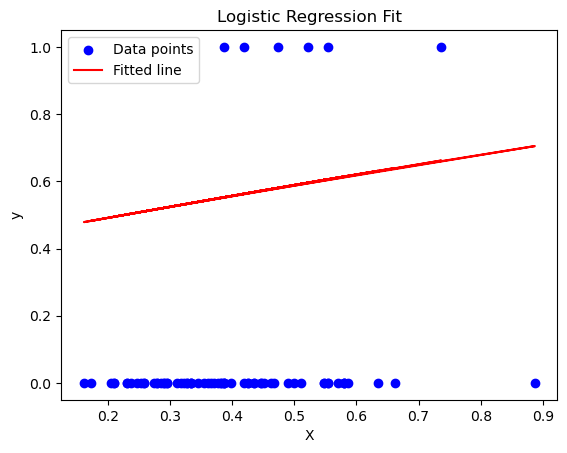

In [38]:
import matplotlib.pyplot as plt

plt.scatter(x_apache_test, y_test, color='blue', label='Data points')
plt.plot(x_apache_test, y_pred_logistic, color='red', label='Fitted line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Logistic Regression Fit')
plt.legend()

plt.show()

### Fit data into LogisticRegression()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

x_apache = cohort_enc['apachescore'].values.reshape(-1, 1)
y = cohort['actualhospitalmortality_enc']

x_apache_train, x_apache_test, y_train, y_test = train_test_split(x_apache, y, train_size=.7, random_state=42)

scaler = MinMaxScaler()
scaler.fit(x_apache_train)
x_apache_train = scaler.transform(x_apache_train)
x_apache_test = scaler.transform(x_apache_test)

model = LogisticRegression()
model = model.fit(x_apache_train, y_train)
y_pred_logistic2 = model.predict(x_apache_test)

print(y_pred_logistic)

[0.53519832 0.54399569 0.57193717 0.56846575 0.57193717 0.56846575
 0.56324607 0.50161472 0.56498758 0.63126486 0.61463125 0.63946882
 0.54926132 0.53343603 0.4927621  0.51931138 0.60621015 0.57713097
 0.53167291 0.60621015 0.51754316 0.57367026 0.53519832 0.5033853
 0.60451815 0.61127073 0.59260607 0.54575206 0.58574898 0.49453244
 0.5960213  0.70485487 0.5527657  0.51046633 0.61630745 0.48214543
 0.54750728 0.57885851 0.66199885 0.51046633 0.5527657  0.55626484
 0.53343603 0.52107912 0.51577451 0.61463125 0.56498758 0.5527657
 0.49453244 0.58918186 0.60621015 0.50692617 0.51754316 0.58058412
 0.47860965 0.50869636 0.52814435 0.60451815 0.55101415 0.529909
 0.5527657  0.52284633 0.55101415 0.53872021 0.56324607 0.61463125
 0.52284633 0.54223823 0.53519832 0.50161472 0.52107912]


### Plot the fitted logistic regression line

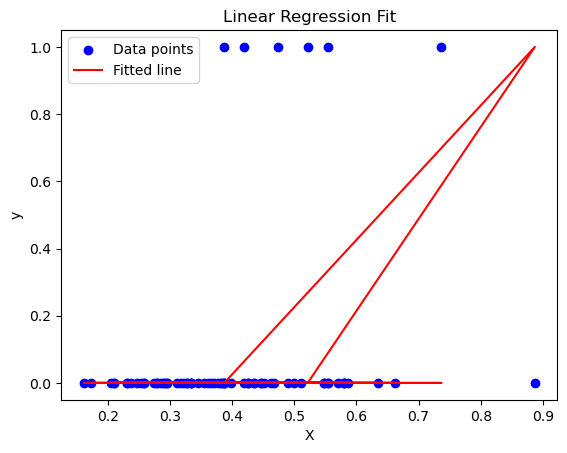

In [40]:
import matplotlib.pyplot as plt

plt.scatter(x_apache_test, y_test, color='blue', label='Data points')
plt.plot(x_apache_test, y_pred_logistic2, color='red', label='Fitted line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

plt.show()

### Plot the logistic regression predictions in scatter plot

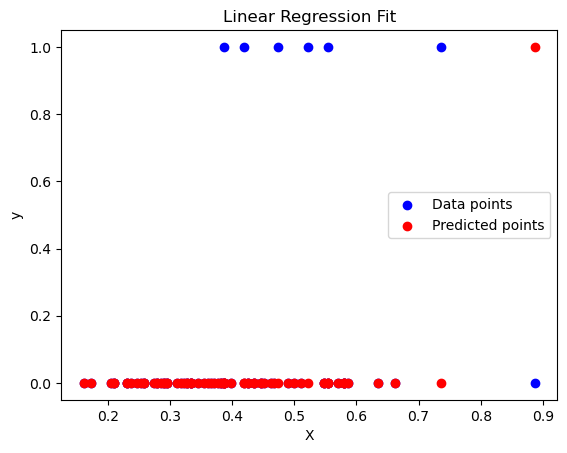

In [41]:
import matplotlib.pyplot as plt

plt.scatter(x_apache_test, y_test, color='blue', label='Data points')
plt.scatter(x_apache_test, y_pred_logistic2, color='red', label='Predicted points')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

plt.show()

### Create a confusion matrix for the logistic regression model

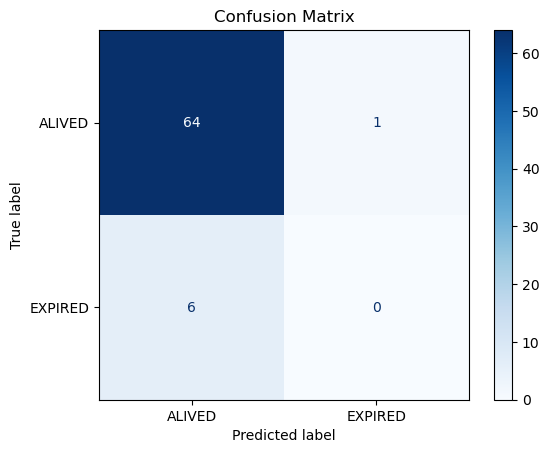

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_logistic2, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ALIVED", "EXPIRED"])

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Calculate accuracy, precision, recall, specificity, and F1 score

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_logistic2)
precision = precision_score(y_test, y_pred_logistic2)
recall = recall_score(y_test, y_pred_logistic2)
f1 = f1_score(y_test, y_pred_logistic2)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9014
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


### Plot the ROC-AUC

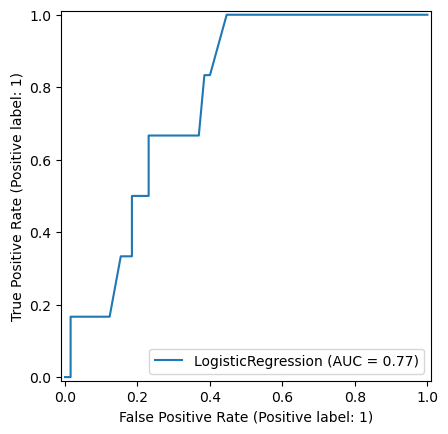

In [44]:
from sklearn import metrics

metrics.RocCurveDisplay.from_estimator(model, x_apache_test, y_test)

### Fit our data into linear regression with all 13 features

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

x = cohort_enc.drop('actualhospitalmortality_enc', axis=1)
y = cohort_enc['actualhospitalmortality_enc']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=42)

x_train = x_train.fillna(x_train.median())
x_test = x_test.fillna(x_train.median())

scaler = MinMaxScaler()
scaler.fit(x_train)
x_apache_train = scaler.transform(x_train)
x_apache_test = scaler.transform(x_test)

model = LinearRegression()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### Fit our data into logistic regression with all 13 features

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

x = cohort_enc.drop('actualhospitalmortality_enc', axis=1)
y = cohort_enc['actualhospitalmortality_enc']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=42)

x_train = x_train.fillna(x_train.median())
x_test = x_test.fillna(x_train.median())

scaler = MinMaxScaler()
scaler.fit(x_train)
x_apache_train = scaler.transform(x_train)
x_apache_test = scaler.transform(x_test)

model = LogisticRegression()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/home/jiajia/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
